1. Training features with DT and GradientBoost
2. Feature engineering with DT
3. Feature importance with SHAP and GradientBoost
4. Save variants of models

In [1]:
!pip install shap

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import shap
import graphviz
import numpy as np
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import pickle

In [3]:
fig_path = '/content/drive/MyDrive/CSC791:NLP/project/figures/'
model_path = '/content/drive/MyDrive/CSC791:NLP/project/models/'

In [4]:
def drop_unnamed_column(df):
  print("before unknown: ", df.shape)
  df = df.drop(columns=df.columns[0])
  print("after dropping unknown: ", df.shape)

  return df

In [5]:
# Drop nulls if any
def drop_nulls(features_df: pd.DataFrame()):
  if features_df.isnull().sum().any() > 0:
    print(f'Dropping Nulls')

  features_df = features_df.dropna()
  print('Features shape after dropping nulls: ',features_df.shape)

  return features_df

In [6]:
def train_dt(data: pd.DataFrame(), fig_name: str(), model_name: str()):
  # Check and drop in any nulls
  data = drop_nulls(data)
  datacopy = data
  feature_names = datacopy.drop('labels', axis=1).columns

  # Train Test Split
  train_data_X, test_data_X, train_data_Y, test_data_Y = train_test_split(data.drop('labels', axis=1), data['labels'], test_size=0.3)
  print(train_data_X.shape, train_data_Y.shape, test_data_X.shape, test_data_Y.shape)

  # Normalize the data
  scaler = StandardScaler()
  scaler.fit(train_data_X)
  print('scaler mean\n',scaler.mean_)
  train_data_X = scaler.transform(train_data_X)
  test_data_X = scaler.transform(test_data_X)
  print(train_data_X.shape, train_data_Y.shape, test_data_X.shape, test_data_Y.shape)

  baseline_model = DecisionTreeClassifier(max_depth=5)
  baseline_model.fit(train_data_X, train_data_Y)
  baseline_model.score(train_data_X, train_data_Y)
  preds = baseline_model.predict(test_data_X)

  fig = plt.figure(figsize=(15,15))

  print(classification_report(preds, test_data_Y))

  tree.plot_tree(baseline_model, feature_names=feature_names, class_names=['True', 'False'], filled=True, fontsize=10)
  plt.show()

  fig.savefig(fig_path + fig_name)
  print('Figure saved')

  # save the iris classification model as a pickle file
  model_pkl_file = model_path + model_name

  with open(model_pkl_file, 'wb') as file:
    pickle.dump(baseline_model, file)

  print('Model saved')

  return baseline_model

In [39]:
def train_gbc_with_shap(data: pd.DataFrame(), model_name: str()):
  # Check and drop in any nulls
  data = drop_nulls(data)
  datacopy = data
  feature_names = datacopy.drop('labels', axis=1).columns
  print(feature_names)

  # Train Test Split
  train_data_X, test_data_X, train_data_Y, test_data_Y = train_test_split(data.drop('labels', axis=1), data['labels'], test_size=0.3)
  print(train_data_X.shape, train_data_Y.shape, test_data_X.shape, test_data_Y.shape)

  model = sklearn.ensemble.GradientBoostingClassifier(n_estimators=3)
  model.fit(train_data_X, train_data_Y)

  preds = model.predict(test_data_X)
  print(classification_report(preds, test_data_Y))

  # # SHAP Explainer
  explainer = shap.Explainer(model.predict, test_data_X)
  shap_values = explainer(test_data_X)

  shap.summary_plot(shap_values, max_display=7, show=False, plot_type='bar')

  # save the iris classification model as a pickle file
  model_pkl_file = model_path + model_name

  with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

  print('Model saved')

  return model, shap_values

### Read dataset

In [7]:
dataset = pd.read_csv(r"/content/drive/MyDrive/CSC791:NLP/project/dataset.csv")
# Separate the X(jokes) and the Y(is_humor or not)

jokes = list(dataset['text'])
labels = list(dataset['humor'])

### Read three feature dataframes

In [8]:
nrc_lex_features = pd.read_csv('/content/drive/MyDrive/CSC791:NLP/project/nrclex-features.csv')
syntactic_features = pd.read_csv('/content/drive/MyDrive/CSC791:NLP/project/syntactic-features.csv')
semantic_features = pd.read_csv('/content/drive/MyDrive/CSC791:NLP/project/semantic_features.csv')

In [9]:
nrc_lex_features.shape, syntactic_features.shape, semantic_features.shape

((200000, 11), (200000, 15), (200000, 10))

In [10]:
nrc_lex_features = drop_unnamed_column(nrc_lex_features)
syntactic_features = drop_unnamed_column(syntactic_features)
semantic_features = drop_unnamed_column(semantic_features)

before unknown:  (200000, 11)
after dropping unknown:  (200000, 10)
before unknown:  (200000, 15)
after dropping unknown:  (200000, 14)
before unknown:  (200000, 10)
after dropping unknown:  (200000, 9)


In [11]:
# Combine all features
features = pd.concat([nrc_lex_features, syntactic_features, semantic_features], axis=1)
features.shape

(200000, 33)

In [12]:
# Concat Labels in feature dataframes
nrc_lex_features['labels'] = labels
syntactic_features['labels'] = labels
semantic_features['labels'] = labels
features['labels'] = labels

nrc_lex_features.shape, syntactic_features.shape, semantic_features.shape, features.shape

((200000, 11), (200000, 15), (200000, 10), (200000, 34))

Features shape after dropping nulls:  (200000, 11)
(140000, 10) (140000,) (60000, 10) (60000,)
scaler mean
 [0.00967425 0.00614066 0.01046514 0.01522468 0.00712033 0.02824102
 0.02102897 0.00698512 0.00437995 0.00757424]
(140000, 10) (140000,) (60000, 10) (60000,)
              precision    recall  f1-score   support

       False       0.49      0.66      0.56     22442
        True       0.74      0.59      0.66     37558

    accuracy                           0.61     60000
   macro avg       0.61      0.62      0.61     60000
weighted avg       0.65      0.61      0.62     60000



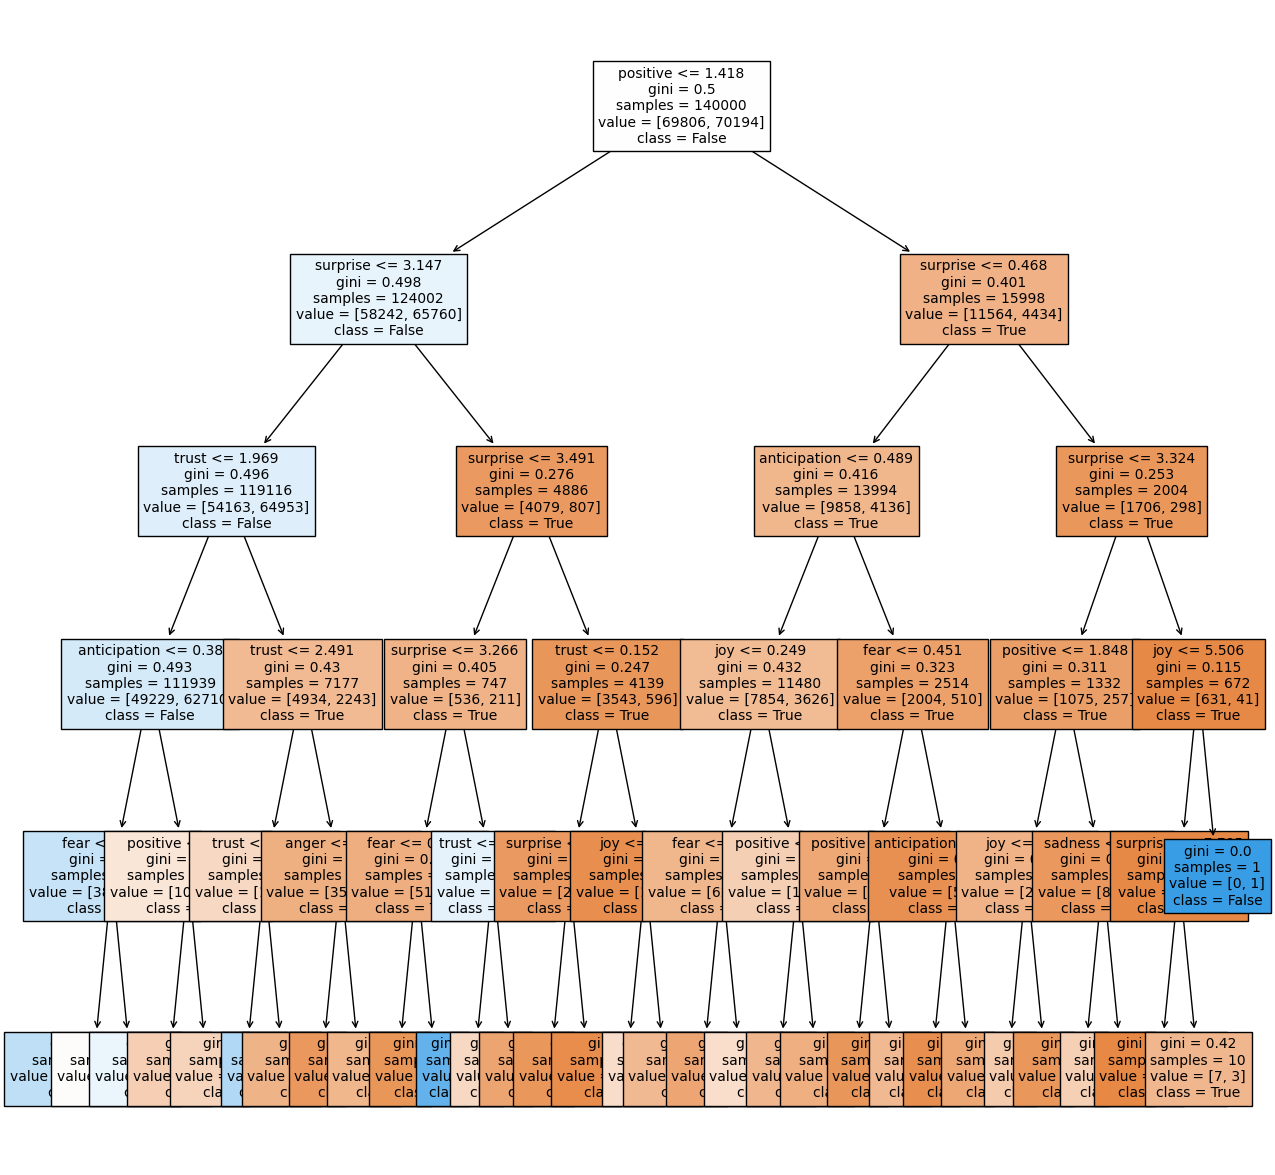

Figure saved
Model saved


In [13]:
nrclex_model = train_dt(nrc_lex_features, 'dt_nrclex.png', 'dt_nrclex.pkl')

Features shape after dropping nulls:  (200000, 15)
(140000, 14) (140000,) (60000, 14) (60000,)
scaler mean
 [3.2322     2.31665    0.78288571 0.00807143 0.52004947 0.36386073
 0.11494208 0.35861552 0.506343   0.1864582  2.37759605 1.69424213
 0.74063166 0.32579796]
(140000, 14) (140000,) (60000, 14) (60000,)
              precision    recall  f1-score   support

       False       0.70      0.74      0.72     28436
        True       0.75      0.72      0.73     31564

    accuracy                           0.73     60000
   macro avg       0.73      0.73      0.73     60000
weighted avg       0.73      0.73      0.73     60000



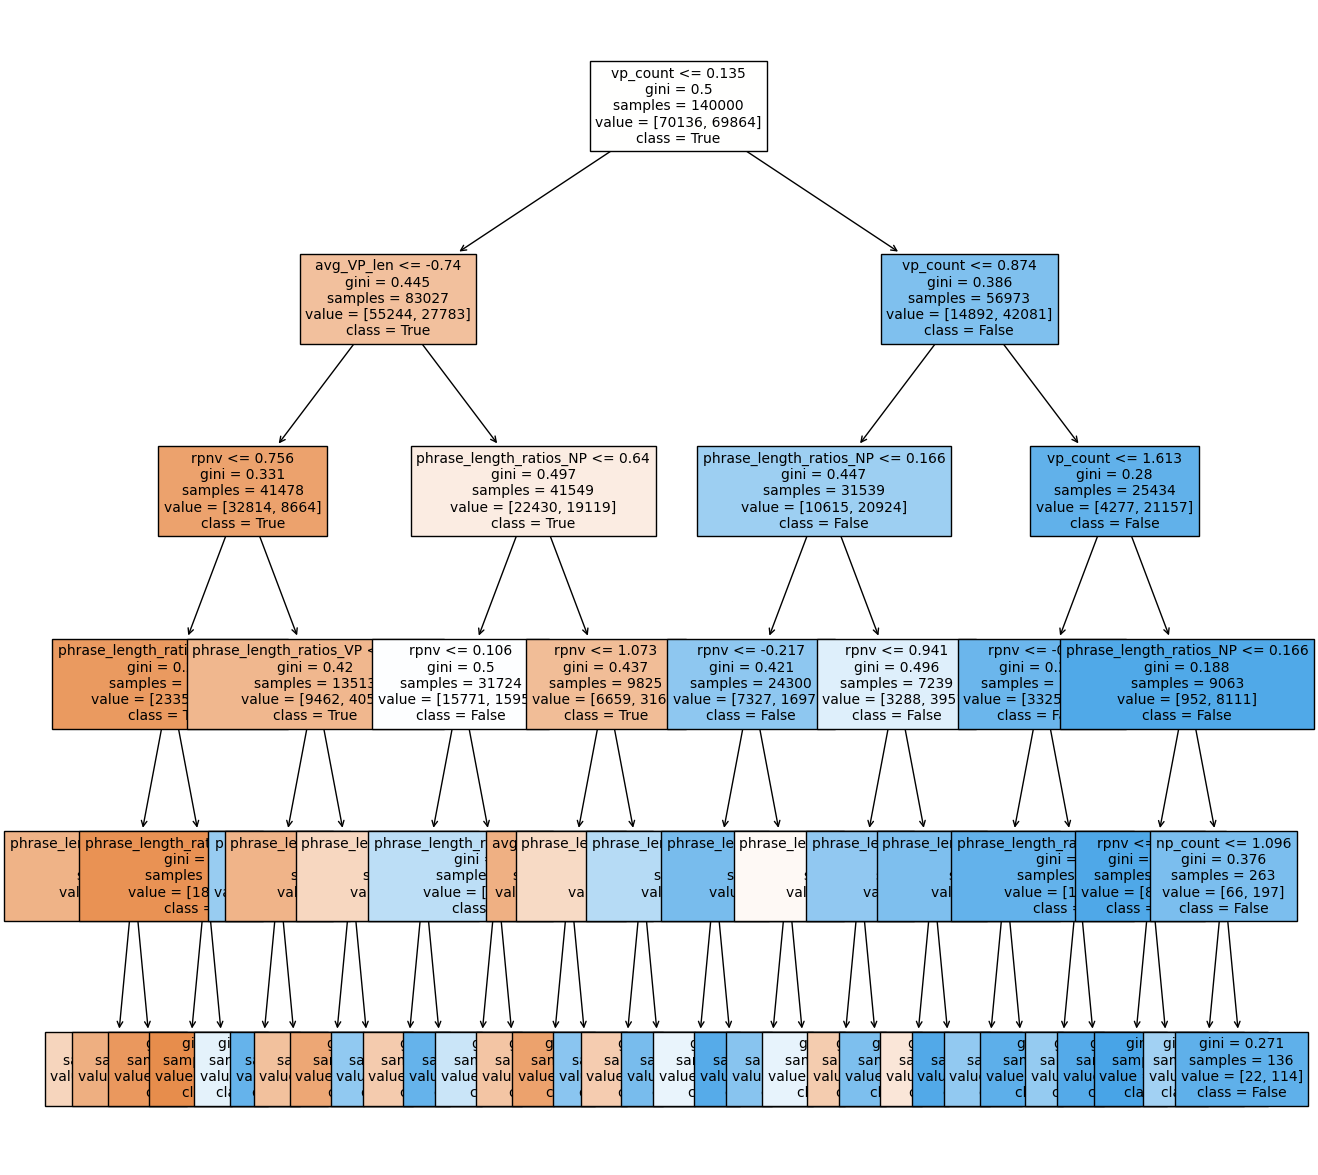

Figure saved
Model saved


In [14]:
syntactic_model = train_dt(syntactic_features, 'dt_syntactic.png', 'dt_syntactic.pkl')

Dropping Nulls
Features shape after dropping nulls:  (199974, 10)
(139981, 9) (139981,) (59993, 9) (59993,)
scaler mean
 [ 8.99096501e-01 -2.09992669e-01  7.64619818e+08  4.38589323e-01
  5.21618543e-02  7.55373944e+00  2.00712240e+00  7.00817968e+00
  2.27035812e+00]
(139981, 9) (139981,) (59993, 9) (59993,)
              precision    recall  f1-score   support

       False       0.73      0.66      0.69     33330
        True       0.62      0.69      0.65     26663

    accuracy                           0.67     59993
   macro avg       0.67      0.67      0.67     59993
weighted avg       0.68      0.67      0.67     59993



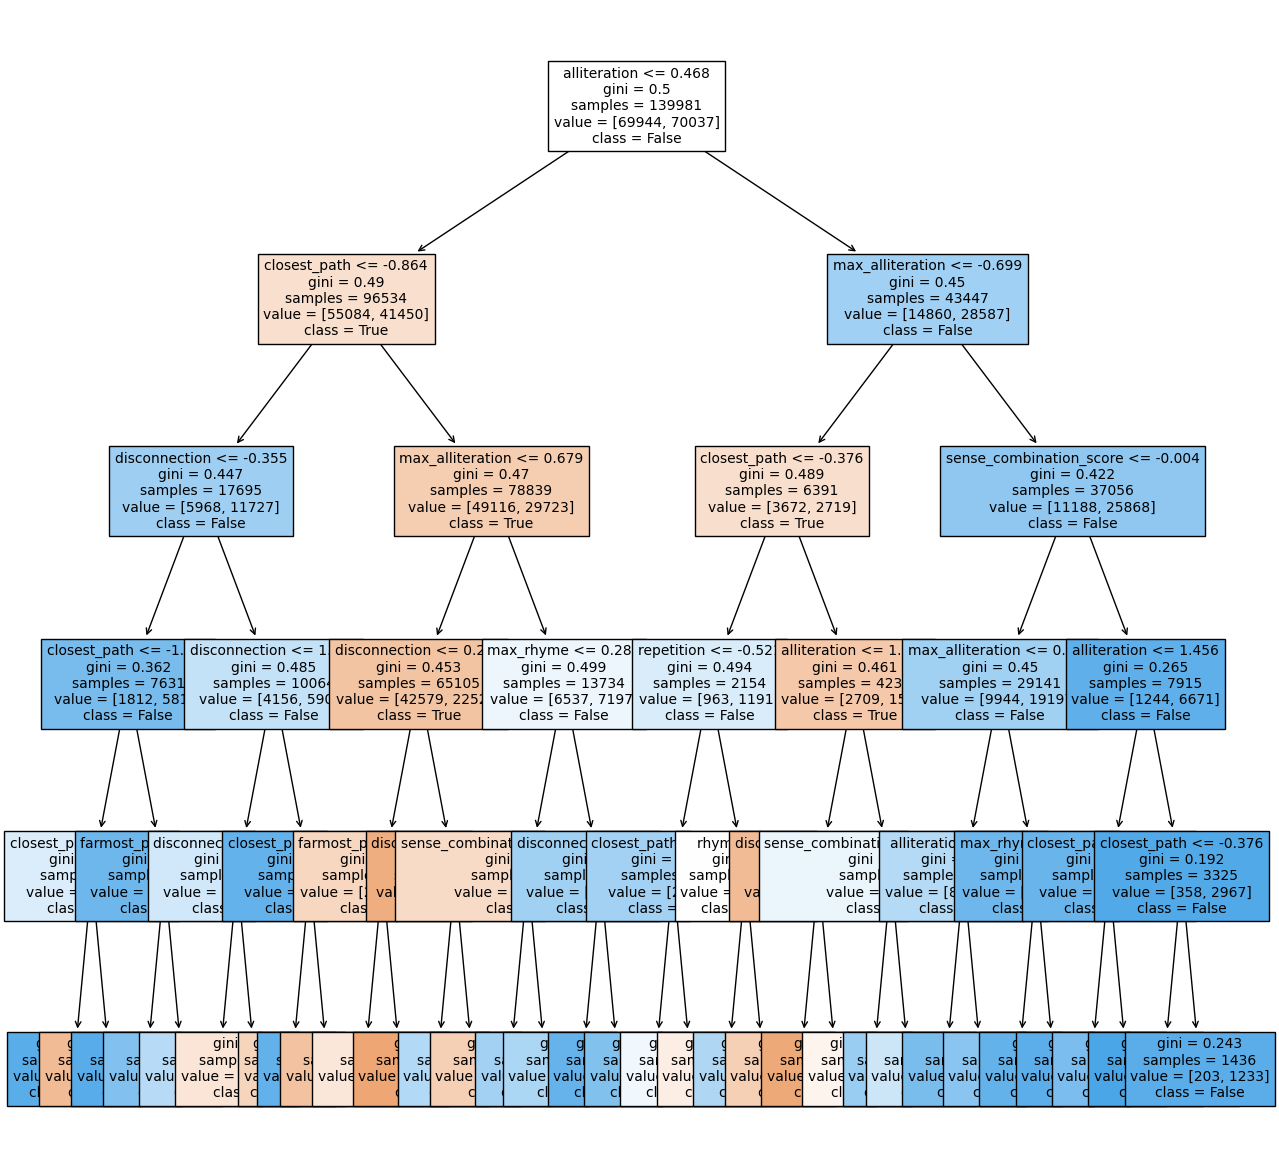

Figure saved
Model saved


In [15]:
semantic_model = train_dt(semantic_features, 'dt_semantic.png', 'dt_semantic.pkl')

Dropping Nulls
Features shape after dropping nulls:  (199974, 34)
(139981, 33) (139981,) (59993, 33) (59993,)
scaler mean
 [ 9.73102805e-03  6.20542800e-03  1.04418223e-02  1.51982302e-02
  7.06618736e-03  2.82027236e-02  2.10893196e-02  6.97594285e-03
  4.39394480e-03  7.56167207e-03  3.22895250e+00  2.31762168e+00
  7.81341754e-01  8.05823647e-03  5.19781586e-01  3.64299100e-01
  1.14778653e-01  3.58877749e-01  5.06269436e-01  1.86344381e-01
  2.37491606e+00  1.69531734e+00  7.38991304e-01  3.25713272e-01
  8.99164043e-01 -2.10345349e-01  7.44497371e+08  4.38587005e-01
  5.21707280e-02  7.55055329e+00  2.00647231e+00  7.00715097e+00
  2.26963659e+00]
(139981, 33) (139981,) (59993, 33) (59993,)
              precision    recall  f1-score   support

       False       0.74      0.73      0.74     30413
        True       0.73      0.74      0.74     29580

    accuracy                           0.74     59993
   macro avg       0.74      0.74      0.74     59993
weighted avg       0.74

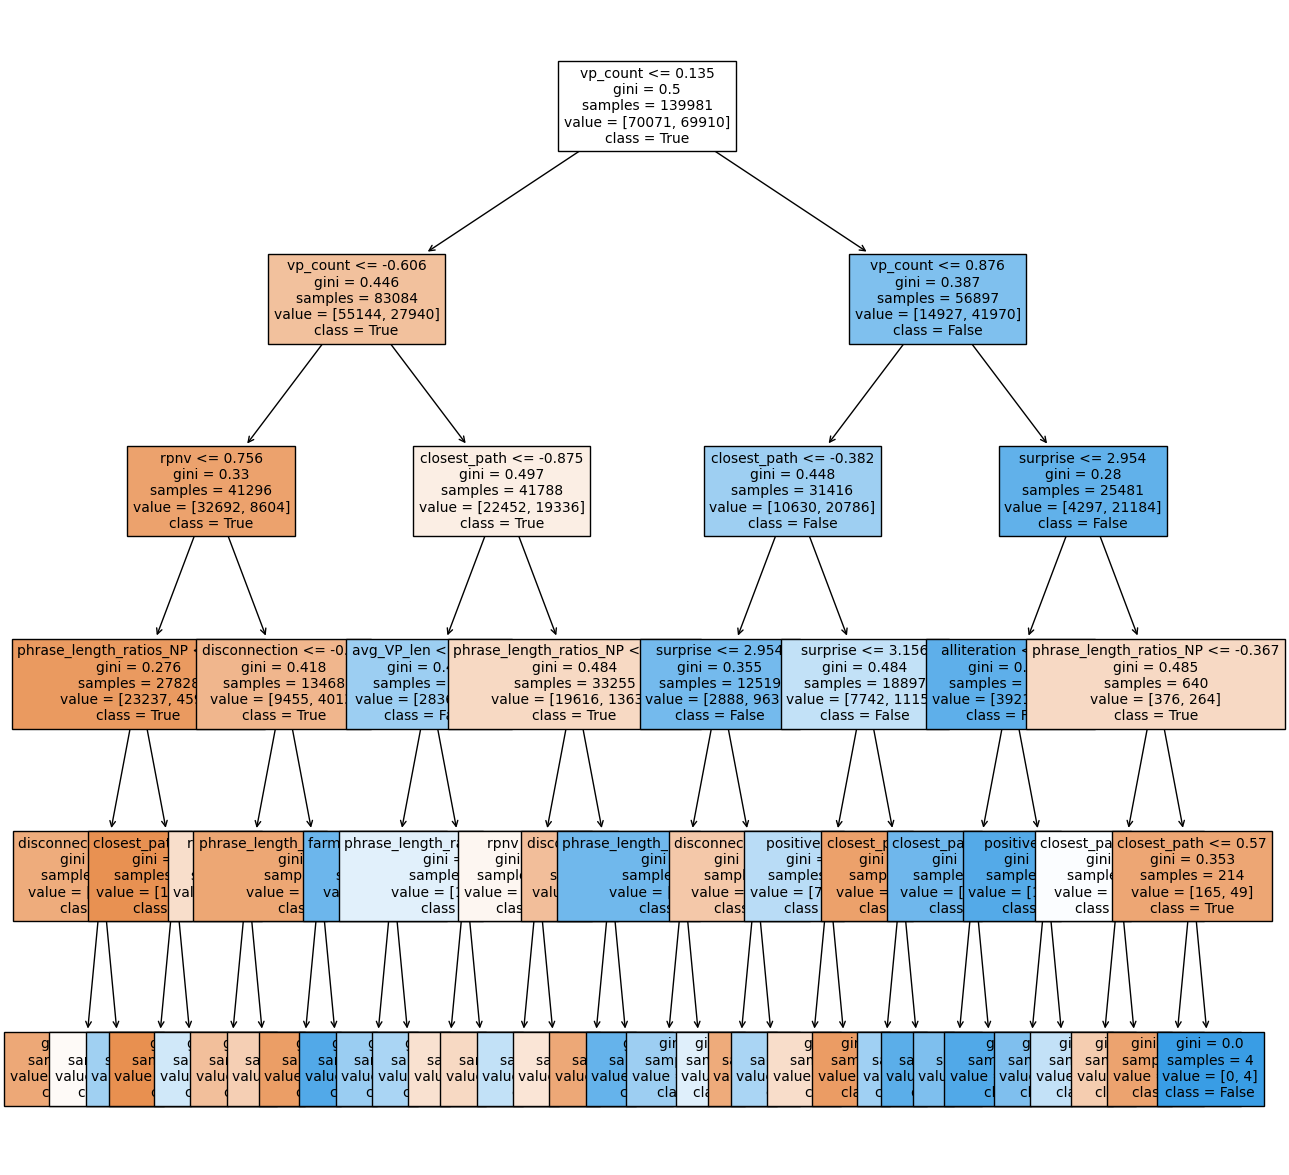

Figure saved
Model saved


In [16]:
combined_model = train_dt(features, 'dt_combined_features.png', 'dt_combined_features.pkl')

Features shape after dropping nulls:  (200000, 11)
Index(['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive',
       'negative', 'sadness', 'disgust', 'joy'],
      dtype='object')
(140000, 10) (140000,) (60000, 10) (60000,)
              precision    recall  f1-score   support

       False       0.38      0.69      0.49     16303
        True       0.83      0.57      0.68     43697

    accuracy                           0.61     60000
   macro avg       0.61      0.63      0.58     60000
weighted avg       0.71      0.61      0.63     60000



ExactExplainer explainer: 60001it [17:08, 57.74it/s]                           


Model saved


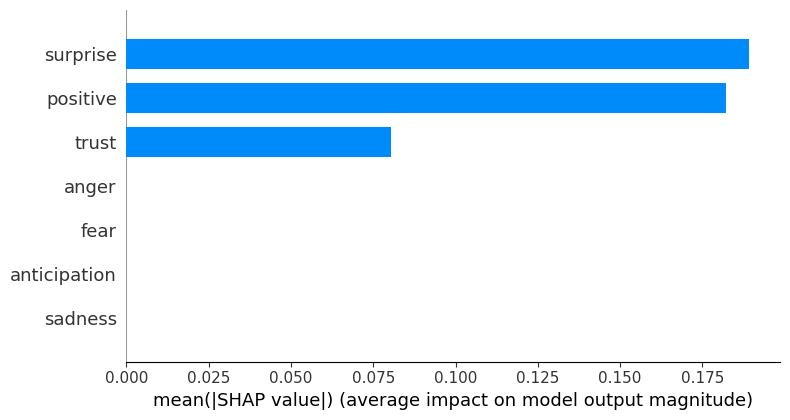

In [42]:
nrclex_model_gbc, lex_shap_values = train_gbc_with_shap(nrc_lex_features, 'gbc_nrclex.pkl')

Features shape after dropping nulls:  (200000, 15)
Index(['np_count', 'vp_count', 'pp_count', 'sbar_count', 'np_ratio',
       'vp_ratio', 'pp_ratio', 'phrase_length_ratios_VP',
       'phrase_length_ratios_NP', 'phrase_length_ratios_PP', 'avg_NP_len',
       'avg_VP_len', 'avg_PP_len', 'rpnv'],
      dtype='object')
(140000, 14) (140000,) (60000, 14) (60000,)
              precision    recall  f1-score   support

       False       0.73      0.71      0.72     30907
        True       0.70      0.72      0.71     29093

    accuracy                           0.71     60000
   macro avg       0.71      0.71      0.71     60000
weighted avg       0.71      0.71      0.71     60000



PermutationExplainer explainer: 60001it [49:54, 19.96it/s]                           


Model saved


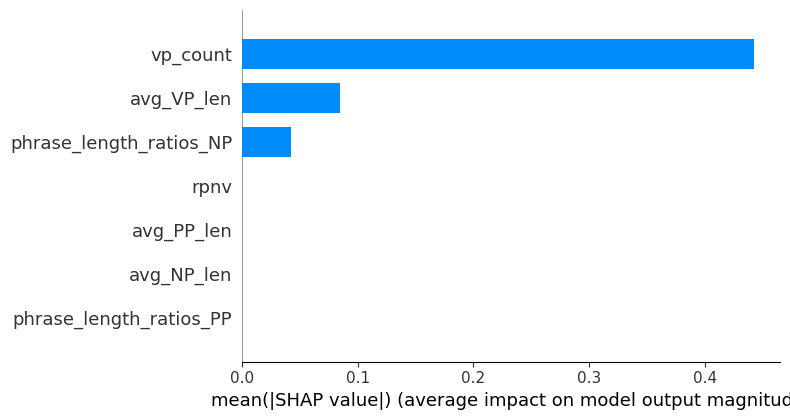

In [44]:
syntactic_model_gbc, syntactic_shap_values = train_gbc_with_shap(syntactic_features, 'gbc_syntactic.pkl')

Dropping Nulls
Features shape after dropping nulls:  (199974, 10)
Index(['disconnection', 'repetition', 'sense_combination_score',
       'farmost_path', 'closest_path', 'alliteration', 'max_alliteration',
       'rhyme', 'max_rhyme'],
      dtype='object')
(139981, 9) (139981,) (59993, 9) (59993,)
              precision    recall  f1-score   support

       False       0.68      0.64      0.66     32280
        True       0.61      0.66      0.63     27713

    accuracy                           0.65     59993
   macro avg       0.65      0.65      0.65     59993
weighted avg       0.65      0.65      0.65     59993



ExactExplainer explainer: 59994it [12:52, 76.48it/s]                           


Model saved


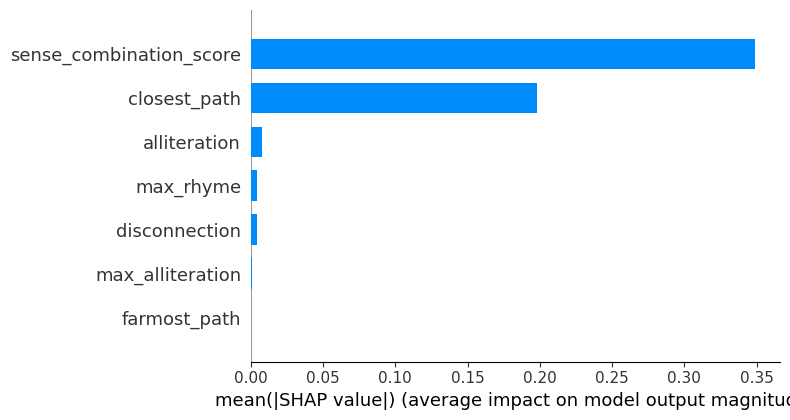

In [45]:
semantic_model_gbc, semantic_shap_values = train_gbc_with_shap(semantic_features, 'gbc_semantic.pkl')

Dropping Nulls
Features shape after dropping nulls:  (199974, 34)
Index(['fear', 'anger', 'anticipation', 'trust', 'surprise', 'positive',
       'negative', 'sadness', 'disgust', 'joy', 'np_count', 'vp_count',
       'pp_count', 'sbar_count', 'np_ratio', 'vp_ratio', 'pp_ratio',
       'phrase_length_ratios_VP', 'phrase_length_ratios_NP',
       'phrase_length_ratios_PP', 'avg_NP_len', 'avg_VP_len', 'avg_PP_len',
       'rpnv', 'disconnection', 'repetition', 'sense_combination_score',
       'farmost_path', 'closest_path', 'alliteration', 'max_alliteration',
       'rhyme', 'max_rhyme'],
      dtype='object')
(139981, 33) (139981,) (59993, 33) (59993,)
              precision    recall  f1-score   support

       False       0.76      0.71      0.73     32599
        True       0.68      0.74      0.71     27394

    accuracy                           0.72     59993
   macro avg       0.72      0.72      0.72     59993
weighted avg       0.73      0.72      0.72     59993



PermutationExplainer explainer: 59994it [31:29, 31.55it/s]                           


Model saved


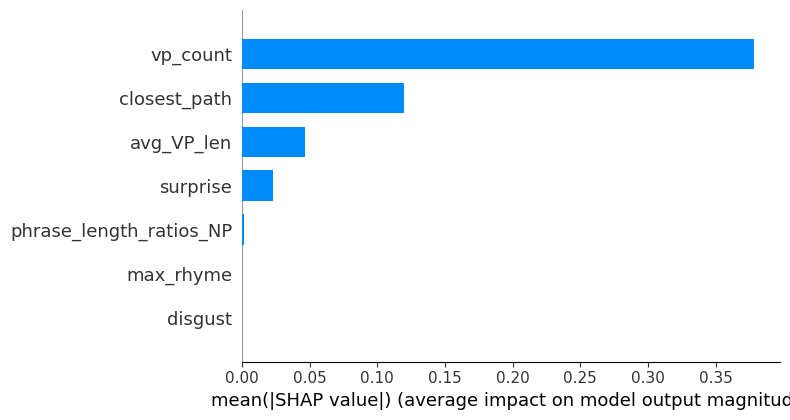

In [46]:
combined_model_gbc, com_shap_values = train_gbc_with_shap(features, 'gbc_combined_features.pkl')